### Author: Sophal Chan
## Simple Linear Regression from scracth 

# Simple Linear Regression

In this notebook, we are going to implement a simple linear regression model using Python, without the help of any machine learning libraries. We will calculate the model parameters (slope and y-intercept), as well as the R-squared and adjusted R-squared values.

The formula for a simple linear regression is:

y = mx + c

where:
- y is the dependent variable
- x is the independent variable
- m is the slope of the line (coefficient)
- c is the y-intercept

### Calculate m and c
The formulas for calculating the coefficient (m) and the y-intercept (c) are as follows:

m = [n(Σxy) - (Σx)(Σy)] / [n(Σx²) - (Σx)²] 

c = [(Σy)(Σx²) - (Σx)(Σxy)] / [n(Σx²) - (Σx)²]

where:
- n is the number of observations
- Σxy is the sum of the product of x and y
- Σx and Σy are the sum of x and y respectively
- Σx² is the sum of the squares of x

### Calculate R-square and adjust R-square
After finding the coefficient and the intercept, we calculate the R-squared value using the following formula:

R² = 1 - [Σ(yi - ŷi)² / Σ(yi - ȳ)²]

where:
- yi is the actual value of y
- ŷi is the predicted value of y (which we get from our linear equation)
- ȳ is the mean value of y

Finally, the adjusted R-squared value is calculated as follows:

Adjusted R² = 1 - [(1 - R²)(n - 1) / (n - p - 1)]

where:
- R² is the R-squared value
- n is the total number of samples
- p is the number of predictors (in this case, p = 1)

In [2]:
#Load data
import pandas as pd

data = pd.read_csv('data1.csv')

In [5]:
# Extracted
x = data['Hours']
y = data['Score']

0     32.502345
1     53.426804
2     61.530358
3     47.475640
4     59.813208
        ...    
95    50.030174
96    49.239765
97    50.039576
98    48.149859
99    25.128485
Name: Hours, Length: 100, dtype: float64

In [16]:
#Calculate the required sums
n = len(x)
sum_x = x.sum()
sum_y = y.sum()
sum_xx = (x**2).sum()
sum_xy = (x*y).sum()

In [17]:
# Calculate the slope (m) and y-intercept (c)
m = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x**2)
c = (sum_y * sum_xx - sum_x * sum_xy) / (n * sum_xx - sum_x**2)
print(m)
print(c)

1.322431022687879
7.991020985734031


In [18]:
#Calculate the predicted values and the mean of y
#  y=1.322431022687879x + 7.991020985734031
y_pred = m * x + c
mean_y = y.mean()

In [19]:
# Calculate the R-squared value
ss_residual = ((y - y_pred)**2).sum()
ss_total = ((y - mean_y)**2).sum()
r_squared = 1 - (ss_residual / ss_total)
print(r_squared)

0.5986557915661921


In [20]:
# Calculate the adjusted R-squared value
p = 1  # number of predictors
adjusted_r_squared = 1 - (1 - r_squared) * (len(y) - 1) / (len(y) - p - 1)


In [21]:
print(f"Coefficient (m): {m}")
print(f"Intercept (c): {c}")
print(f"R-squared: {r_squared}")
print(f"Adjusted R-squared: {adjusted_r_squared}")

Coefficient (m): 1.322431022687879
Intercept (c): 7.991020985734031
R-squared: 0.5986557915661921
Adjusted R-squared: 0.5945604425005411


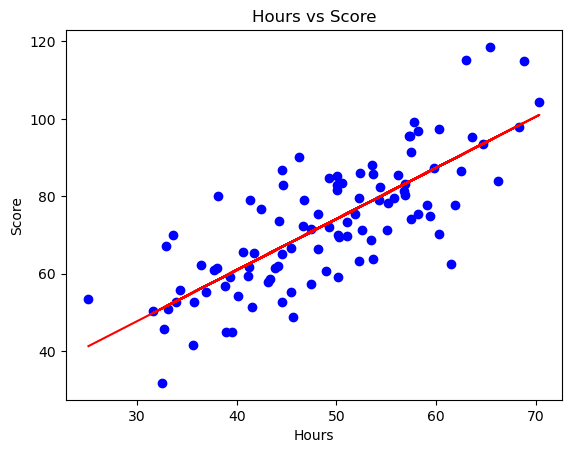

In [22]:
import matplotlib.pyplot as plt

# Create a scatter plot of the data
plt.scatter(x, y, color='blue')

# Create a line plot of the predicted values
plt.plot(x, y_pred, color='red')

# Label the axes
plt.xlabel('Hours')
plt.ylabel('Score')

# Add a title
plt.title('Hours vs Score')

# Display the plot
plt.show()

# Using Sklearn Library


In [1]:
# Import the necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
# Load the data
data = pd.read_csv('data1.csv')

In [3]:
# Extract the independent and dependent variables
x = data['Hours'].values.reshape(-1, 1)
y = data['Score']

In [4]:
# Create a LinearRegression object
lr = LinearRegression()

In [5]:
# Fit the model to the data
lr.fit(x, y)

LinearRegression()

In [6]:
# Predict the y values
y_pred_sklearn = lr.predict(x)

In [7]:
# Print the intercept and coefficient
print(f"Intercept (c): {lr.intercept_}")
print(f"Coefficient (m): {lr.coef_[0]}")

Intercept (c): 7.991020985734465
Coefficient (m): 1.322431022687868


In [8]:
# Calculate the R-squared value
r_squared_sklearn = r2_score(y, y_pred_sklearn)
print(r_squared_sklearn)

0.5986557915661921


In [9]:
# Calculate the adjusted R-squared value
n = len(y)  # total number of samples
p = 1  # number of predictors
adjusted_r_squared_sklearn = 1 - (1 - r_squared_sklearn) * (n - 1) / (n - p - 1)

In [10]:
# Print the results
print(f"Intercept: {lr.intercept_}")
print(f"Coefficient: {lr.coef_[0]}")
print(f"R-squared: {r_squared_sklearn}")
print(f"Adjusted R-squared: {adjusted_r_squared_sklearn}")

Intercept: 7.991020985734465
Coefficient: 1.322431022687868
R-squared: 0.5986557915661921
Adjusted R-squared: 0.5945604425005411


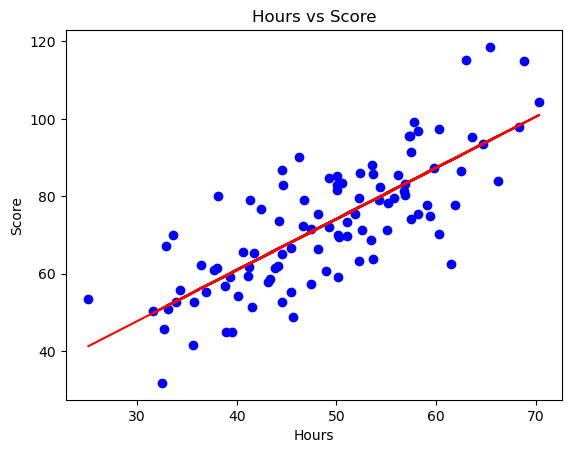

In [12]:
import matplotlib.pyplot as plt
# Create a scatter plot of the data
plt.scatter(x, y, color='blue')

# Create a line plot of the predicted values
plt.plot(x, y_pred_sklearn, color='red')

# Label the axes
plt.xlabel('Hours')
plt.ylabel('Score')

# Add a title
plt.title('Hours vs Score')

# Display the plot
plt.show()

## Use Optimization method 

In this case we will use two different methods  
1. Normal Equation: A mathematical equation that gives the result directly. It uses matrix operations from linear algebra to find the optimal parameters.  
2. Gradient Descent: An iterative optimization algorithm used to find the minimum of a function. Here, we'll use it to find the parameters that minimize our cost function.

Let's start with the Normal Equation method. We will use numpy to perform matrix operations.

### The Normal Equation Method for Linear Regression
The Normal Equation is a method used to solve for the parameters of a linear regression model. 
Unlike methods such as Gradient Descent which iteratively adjust the parameters to minimize the cost function, the Normal Equation solves for the parameters analytically in a single step.


Using calculus and linear algebra, we can derive the Normal Equation that directly gives the values of θ that minimize the cost function:


θ = (XᵀX)⁻¹ Xᵀy

where:

Xᵀ is the transpose of X,  
(XᵀX)⁻¹ is the inverse of the matrix XᵀX.

Intercept: 7.991020985734773
Coefficient: 1.3224310226878626
R-squared: 0.5986557915661921
Adjusted R-squared: 0.5945604425005411


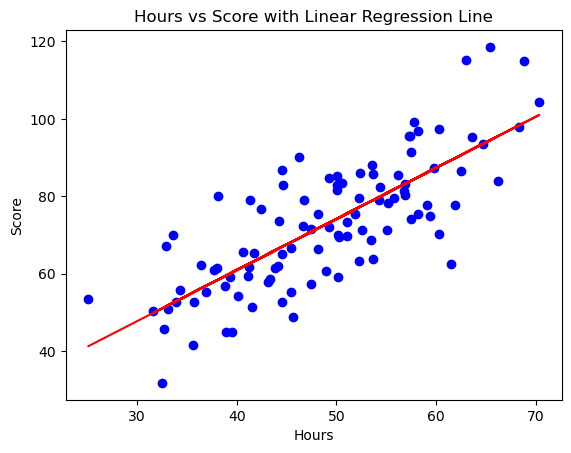

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data1.csv')

# Extract the variables
x = data['Hours'].values.reshape(-1, 1)
y = data['Score']

# Add a column of ones to x to represent the intercept
x_with_ones = np.c_[np.ones((x.shape[0], 1)), x]

# Calculate theta using the normal equation
theta_normal = np.linalg.inv(x_with_ones.T.dot(x_with_ones)).dot(x_with_ones.T).dot(y)

# Extract the intercept and coefficient
intercept = theta_normal[0]
coefficient = theta_normal[1]

# Predict the y values
y_pred_normal = x_with_ones.dot(theta_normal)

# Calculate the R-squared value
r_squared_normal = 1 - ((y - y_pred_normal) ** 2).sum() / ((y - y.mean()) ** 2).sum()

# Calculate the adjusted R-squared value
adjusted_r_squared_normal = 1 - (1 - r_squared_normal) * (len(y) - 1) / (len(y) - x.shape[1] - 1)

print(f"Intercept: {intercept}")
print(f"Coefficient: {coefficient}")
print(f"R-squared: {r_squared_normal}")
print(f"Adjusted R-squared: {adjusted_r_squared_normal}")

# Plot the data and the regression line
plt.scatter(x, y, color='blue')
plt.plot(x, y_pred_normal, color='red')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.title('Hours vs Score with Linear Regression Line')
plt.show()


## Using Gradien Decent 

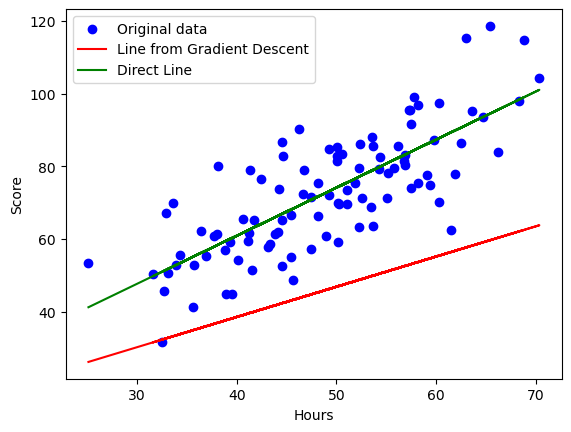

Intercept:  45.99070524474624
Coefficient:  8.102042136031889
R-squared:  -2.0875131224619032
Adjusted R-squared:  -2.119018358405392


In [27]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('data1.csv')

def compute_cost(X, y, theta):
    """Compute the cost function for linear regression."""
    m = len(y)
    predictions = X.dot(theta)
    errors = np.subtract(predictions, y)
    sqrErrors = np.square(errors)
    J = 1 / (2 * m) * np.sum(sqrErrors)

    return J

def gradient_descent(X, y, theta, alpha, iterations):
    """Perform gradient descent to learn the parameters theta."""
    m = len(y)
    cost_history = np.zeros(iterations)

    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, y)
        sum_delta = (alpha / m) * X.transpose().dot(errors)
        theta = theta - sum_delta

        cost_history[i] = compute_cost(X, y, theta)

    return theta, cost_history

# Normalize the 'Hours' feature
data['Hours_normalized'] = (data['Hours'] - data['Hours'].mean()) / data['Hours'].std()

# Initialize some parameters for gradient descent
theta = np.zeros(2)
iterations = 1000
alpha = 0.001

# Add a column of ones to the feature matrix to account for the intercept term
X = np.array([np.ones(len(data)), data['Hours_normalized'].values]).T
y = np.array(data['Score'])

# Perform gradient descent to learn the parameters theta
theta, cost_history = gradient_descent(X, y, theta, alpha, iterations)

# Make predictions using the learned parameters
y_pred = X.dot(theta)

# Calculate the R-squared value
r_squared = r2_score(y, y_pred)

# Calculate the adjusted R-squared value
n = len(y)  # number of samples
p = 1  # number of predictors
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

# Calculate the parameters of the linear regression line directly from the data
m, c = np.polyfit(data['Hours'], data['Score'], 1)

# Calculate the predictions for this line
y_pred_direct = m * data['Hours'] + c

# Plot the original data
plt.scatter(data['Hours'], data['Score'], color='blue', label='Original data')

# Plot the line of best fit found by gradient descent
plt.plot(data['Hours'], y_pred, color='red', label='Line from Gradient Descent')

# Plot the line of best fit found directly from the data
plt.plot(data['Hours'], y_pred_direct, color='green', label='Direct Line')

# Add labels and a legend
plt.xlabel('Hours')
plt.ylabel('Score')
plt.legend()

plt.show()
# Print the intercept and coefficient
print("Intercept: ", theta[0])
print("Coefficient: ", theta[1])

# Print the R-squared and adjusted R-squared
print("R-squared: ", r_squared)
print("Adjusted R-squared: ", adjusted_r_squared)


## Conclusion
In this case, the normal linear model (calculated directly from the data) performed better than the model obtained through gradient descent optimization. The reasons for this could be due to several factors:

1. Feature Scaling: Gradient descent is sensitive to the scale of the features. In our case, we normalized the 'Hours' feature before running gradient descent. However, when we calculated the normal linear model, we did not normalize the feature. The normalization process could have influenced the results.    



2. Learning Rate and Iterations: The performance of gradient descent can be significantly influenced by the choice of learning rate and the number of iterations. If the learning rate is too high, gradient descent can overshoot the minimum. If it's too low, it may take too many iterations to converge or may not converge at all. In our case, it's possible that the learning rate or the number of iterations we chose for the gradient descent algorithm weren't optimal for this dataset.    


3. Algorithm Efficiency: The normal equation used to calculate the parameters of the linear model directly is a mathematical solution that gives the exact parameters that minimize the cost function. On the other hand, gradient descent is an iterative optimization algorithm that incrementally moves towards the minimum of the cost function. Therefore, if the cost function has a single global minimum (as is the case with linear regression), the normal equation will find the exact solution, while gradient descent will only approximate this solution (although it can get arbitrarily close with enough iterations and the right learning rate).  

In summary, while gradient descent can be a powerful tool for optimizing more complex models and for datasets where calculating the normal equation is computationally infeasible, for simple linear regression on small to medium-sized datasets, calculating the parameters directly using the normal equation can often be more straightforward and yield better results.





